In [11]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [12]:
# Reding USD to JPY data from yahoo finance, date 2012-01-01 to 2022-12-31

data= yf.download("USDJPY=X", start="2012-01-01", end="2022-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,77.050003,77.089996,76.870003,77.019997,77.019997,0
2012-01-03,76.933998,76.954002,76.653000,76.930000,76.930000,0
2012-01-04,76.732002,76.814003,76.599998,76.722000,76.722000,0
2012-01-05,76.710999,77.129997,76.669998,76.709999,76.709999,0
2012-01-06,77.158997,77.308998,77.015999,77.151001,77.151001,0


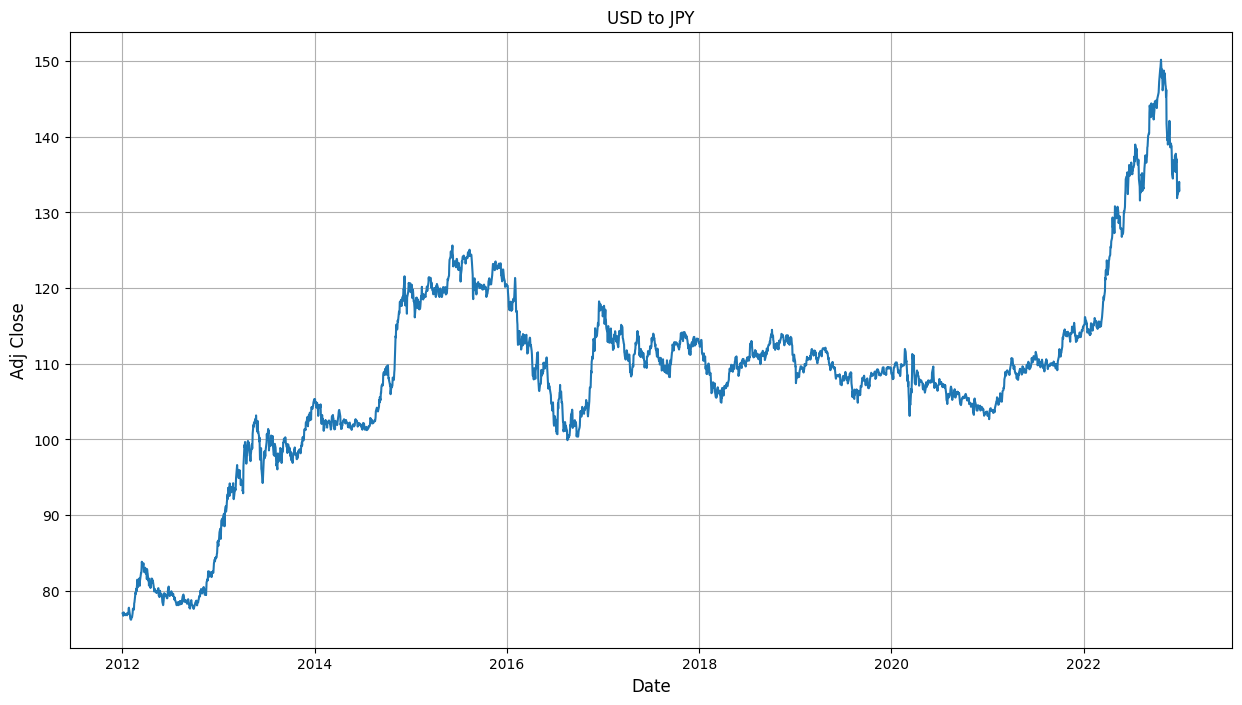

In [13]:
# Line plot of USD to JPY

plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('USD to JPY')
plt.plot(data['Adj Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

## LSTM Model

In [14]:
# Importing libraries for LSTM

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [15]:
# Using Adj Close as the target variable
close_data = data['Adj Close'].values

# Reshaping the data for MinMax
close_data = close_data.reshape(-1,1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(close_data)

print(scaled_data)


[[0.01135192]
 [0.01013568]
 [0.00732472]
 ...
 [0.77444722]
 [0.78185308]
 [0.76674421]]


In [16]:
# Define the look-back period (number of previous time steps to use as input variables)
look_back = 60

# Create the dataset with a specific look-back period
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create training and testing datasets
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)

Epoch 1/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 68s 29ms/step - loss: 0.0028
Epoch 2/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - loss: 3.2360e-04
Epoch 3/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - loss: 2.2164e-04
Epoch 4/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - loss: 1.8012e-04
Epoch 5/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 105s 47ms/step - loss: 1.5940e-04
Epoch 6/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - loss: 1.5584e-04
Epoch 7/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - loss: 1.5413e-04
Epoch 8/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - loss: 1.4768e-04
Epoch 9/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 69s 31ms/step - loss: 1.4949e-04
Epoch 10/10
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - loss: 1.3137e-04
